In [2]:
%pylab inline
import cv2 as cv
import numpy as np
import argparse

Populating the interactive namespace from numpy and matplotlib


In [3]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets 

In [4]:
from structure_tensor import *

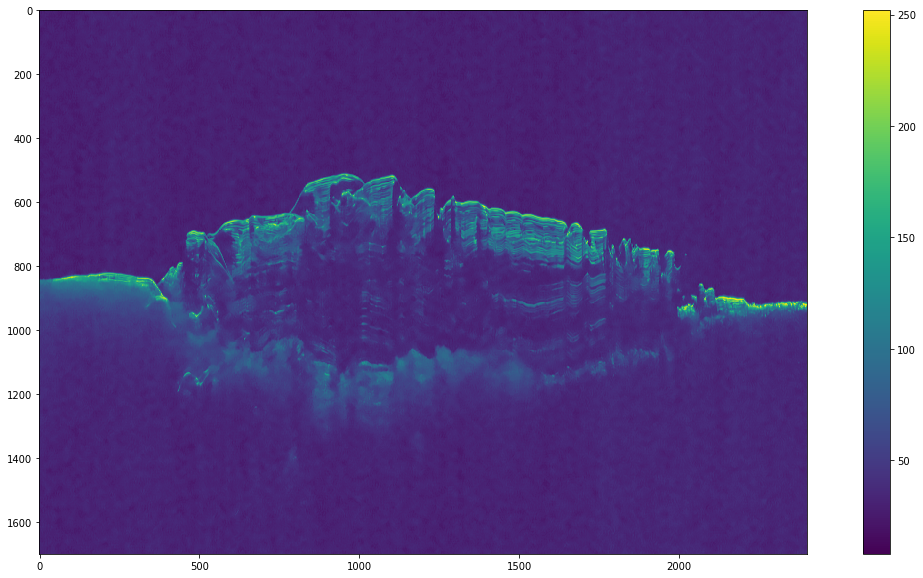

In [5]:
image = ApplyDenoising("sharad_data/s_00429402_thm.jpg")

imgInTiny, imgCoherency, ori, imgCoherencyBin, ori_bin, imgBin, imgBinClear = ApplyStructureTensor(image)

figure(figsize=(20,10))

imshow(imgInTiny)
colorbar()

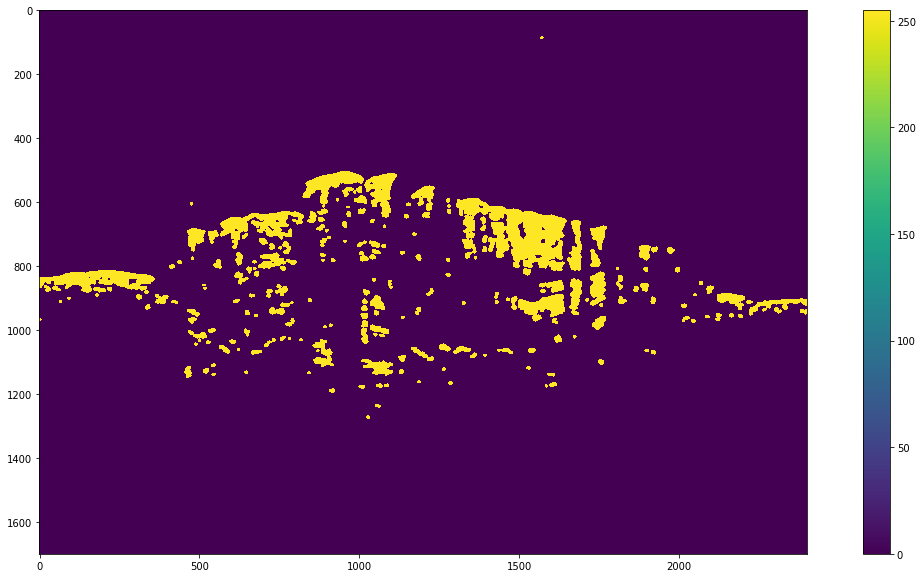

In [6]:
figure(figsize=(20,10))

imshow(imgBinClear)
colorbar()

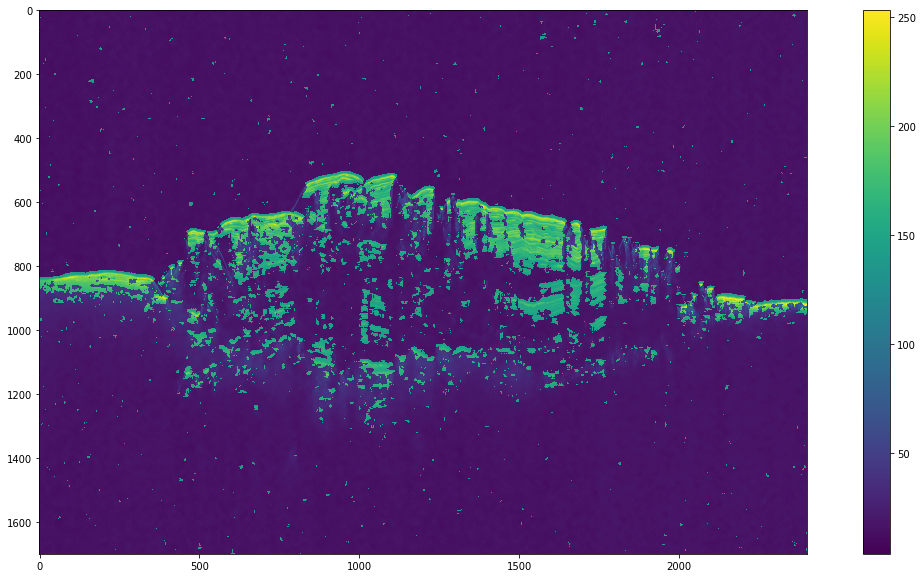

In [7]:
#res = np.uint8(0.5*(imgIn + imgBin))
resTiny = np.uint8(0.5*(imgInTiny + imgBin))
Edges = cv.Canny(imgInTiny,50,100) #2nd,3rd: lower and upper threshold

figure(figsize=(20,10))

imshow(resTiny)
colorbar()

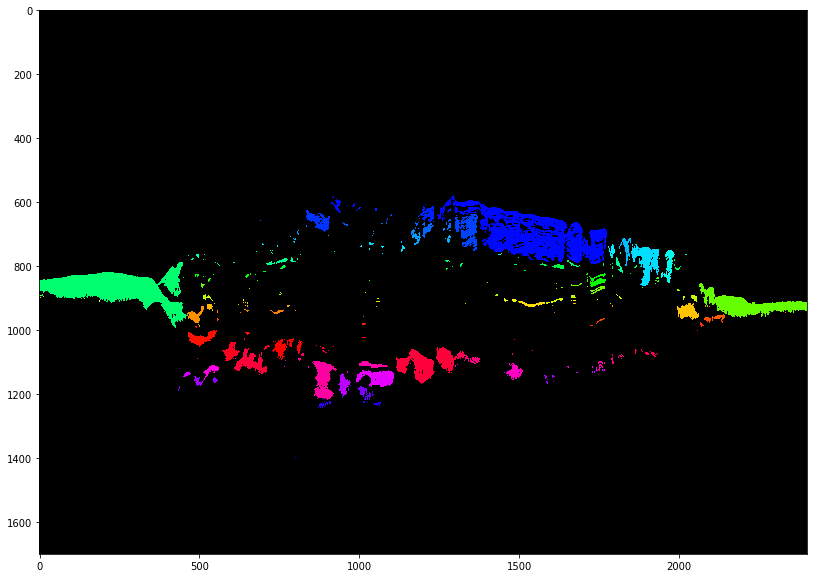

In [8]:
from ConnectedComp import imshow_components

figure(figsize=(20,10))
a = imshow_components(imgInTiny)
imshow(a)

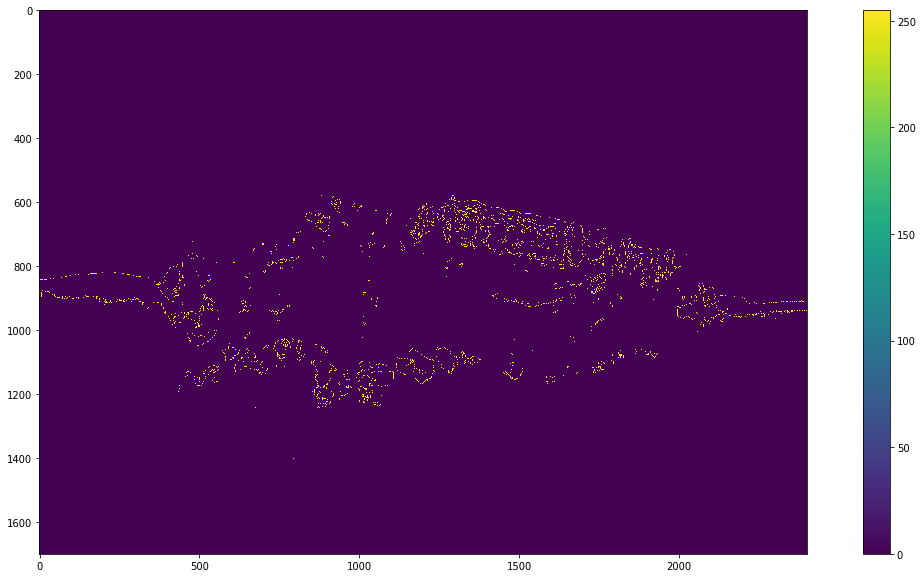

In [9]:
cannylab = cv.Canny(a,50,100)
figure(figsize=(20,10))
imshow(cannylab)
colorbar()

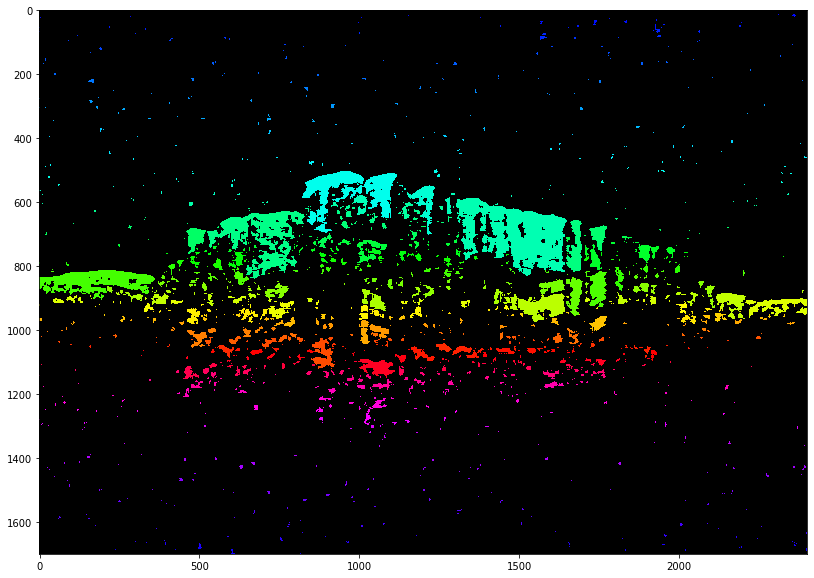

In [10]:
from ConnectedComp import connected_components_for_binaryimg

ori_conncomp = connected_components_for_binaryimg(ori_bin)    

figure(figsize=(20,10))
imshow(ori_conncomp)

# Selection of bigger components

In [11]:
#selection of connected components with pixel area > certain value (valuemean)

from ConnectedComp import selection

index, areas, arearray = selection(imgInTiny)

Total number of connected components: 490
Average area of connected components: 8326.530612244898
Labels of connected components with pixel area higher than average: [0, 1, 3, 131, 198]
Number of pixels of each selected area: [3862598, 47344, 44073, 34923, 13037]

[[      0 3862598]
 [      1   47344]
 [      3   44073]
 [    131   34923]
 [    198   13037]]


New label for 0 component: 0
New label for 1 component: 51
New label for 3 component: 102
New label for 131 component: 153
New label for 198 component: 204


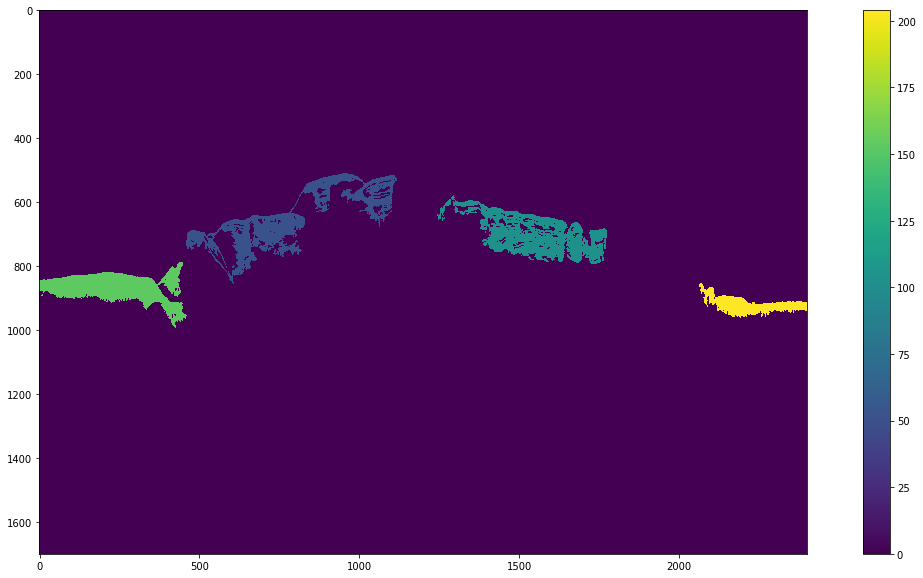

In [12]:
#new array image with only the components having area[pixel]> average area of all components
from ConnectedComp import newimgbigcomponents

newimg, huenewimg = newimgbigcomponents(imgInTiny,index)

figure(figsize=(20,10))
imshow(newimg)
colorbar()

#imsave('conncomp_selection.png',newimg,vmin=newimg.min(), vmax=newimg.max())

In [12]:
import imageio
newimg_uint8 = np.uint8(179*newimg/np.max(newimg))
imageio.imwrite('conncomp_selection.png', newimg_uint8)

print(newimg_uint8.dtype)

uint8


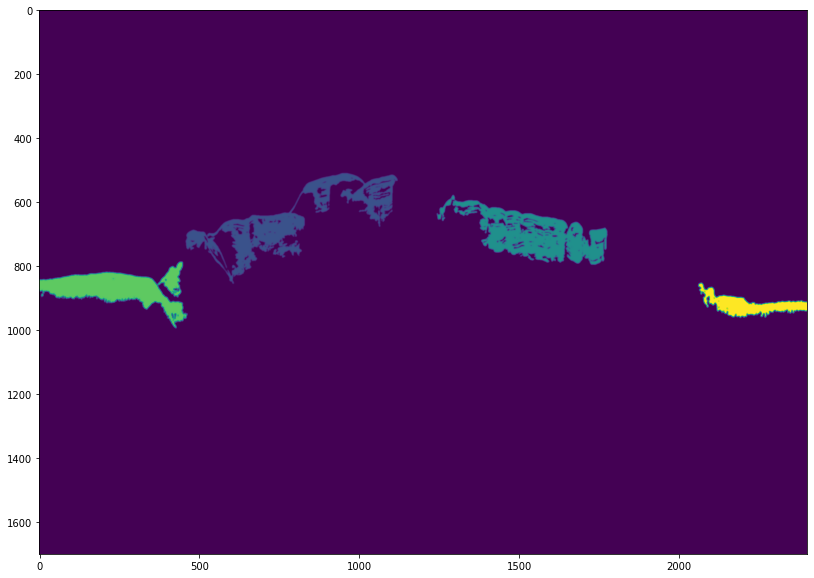

In [13]:
#with edges
figure(figsize=(20,10))
imshow(newimg,interpolation='bicubic')
#imshow(newimg,interpolation='spline16')
#imshow(newimg,interpolation='spline36')

In [14]:
indexoribin, areasoribin, arrayoribin = selection(ori_bin)

Total number of connected components: 2132
Average area of connected components: 1913.6960600375235
Labels of connected components with pixel area higher than average: [0, 387, 390, 426, 467, 524, 546, 571, 581, 637, 815, 829, 866, 881, 960, 981, 995, 1034, 1056, 1328, 1484]
Number of pixels of each selected area: [3802133, 11633, 9649, 4358, 46439, 24758, 4909, 2384, 2935, 2506, 17610, 4600, 3541, 2280, 2405, 8808, 3861, 4935, 1997, 3609, 3524]

[[      0 3802133]
 [    387   11633]
 [    390    9649]
 [    426    4358]
 [    467   46439]
 [    524   24758]
 [    546    4909]
 [    571    2384]
 [    581    2935]
 [    637    2506]
 [    815   17610]
 [    829    4600]
 [    866    3541]
 [    881    2280]
 [    960    2405]
 [    981    8808]
 [    995    3861]
 [   1034    4935]
 [   1056    1997]
 [   1328    3609]
 [   1484    3524]]


New label for 0 component: 0
New label for 387 component: 12
New label for 390 component: 24
New label for 426 component: 36
New label for 467 component: 48
New label for 524 component: 60
New label for 546 component: 72
New label for 571 component: 84
New label for 581 component: 96
New label for 637 component: 108
New label for 815 component: 120
New label for 829 component: 132
New label for 866 component: 144
New label for 881 component: 156
New label for 960 component: 168
New label for 981 component: 180
New label for 995 component: 192
New label for 1034 component: 204
New label for 1056 component: 216
New label for 1328 component: 228
New label for 1484 component: 240


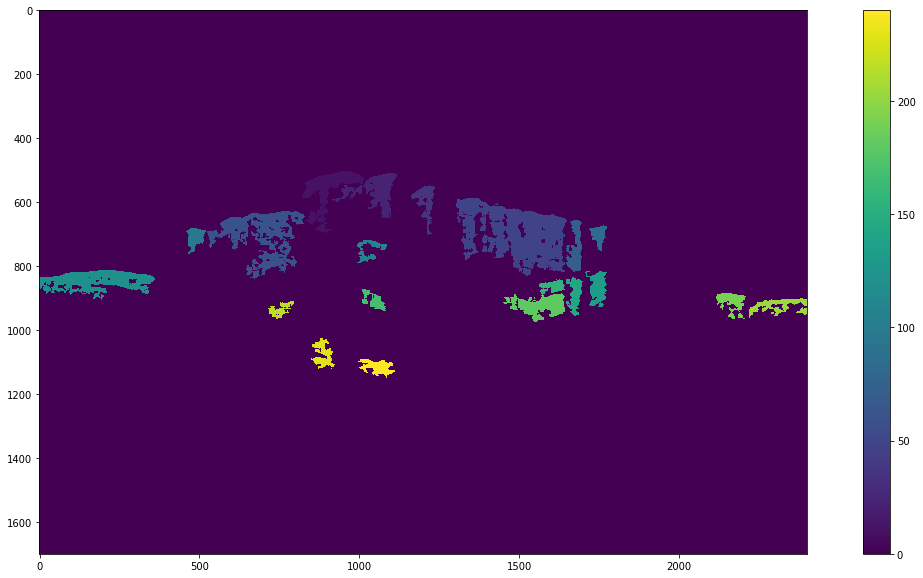

In [15]:
figure(figsize=(20,10))
imshow(newimgbigcomponents(ori_bin,indexoribin)[0])
colorbar()

# Interactive

In [16]:
def threshold(img, thr):
    img = cv.threshold(img, thr, 255, cv.THRESH_BINARY)[1]
    figure(figsize=(20,10))
    imshow(img)

interact(threshold, img=fixed(imgInTiny), thr=(0,255))

interactive(children=(IntSlider(value=127, description='thr', max=255), Output()), _dom_classes=('widget-inter…

<function __main__.threshold(img, thr)>

In [17]:
def connected_components(img, thr):
    img = cv.threshold(img, thr, 255, cv.THRESH_BINARY)[1]  # ensure binary
    num_labels, labels = cv.connectedComponents(img)
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    #print (blank_ch)
    labeled_img = cv.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    figure(figsize=(20,10))
    imshow(labeled_img)

interact(connected_components, img=fixed(imgInTiny), thr=(0,255))

interactive(children=(IntSlider(value=127, description='thr', max=255), Output()), _dom_classes=('widget-inter…

<function __main__.connected_components(img, thr)>

# Finding edges

In [18]:
#finding upper edge 
from ConnectedComp import FindingUpperEdges

edges, upperlimitx, upperlimity = FindingUpperEdges(newimg, huenewimg)

column 0 upper edge at: 843 , with label: 153
column 1 upper edge at: 843 , with label: 153
column 2 upper edge at: 843 , with label: 153
column 3 upper edge at: 843 , with label: 153
column 4 upper edge at: 843 , with label: 153
column 5 upper edge at: 842 , with label: 153
column 6 upper edge at: 843 , with label: 153
column 7 upper edge at: 843 , with label: 153
column 8 upper edge at: 843 , with label: 153
column 9 upper edge at: 843 , with label: 153
column 10 upper edge at: 843 , with label: 153
column 11 upper edge at: 842 , with label: 153
column 12 upper edge at: 842 , with label: 153
column 13 upper edge at: 842 , with label: 153
column 14 upper edge at: 842 , with label: 153
column 15 upper edge at: 842 , with label: 153
column 16 upper edge at: 842 , with label: 153
column 17 upper edge at: 842 , with label: 153
column 18 upper edge at: 843 , with label: 153
column 19 upper edge at: 843 , with label: 153
column 20 upper edge at: 843 , with label: 153
column 21 upper edge at

column 183 upper edge at: 823 , with label: 153
column 184 upper edge at: 823 , with label: 153
column 185 upper edge at: 823 , with label: 153
column 186 upper edge at: 822 , with label: 153
column 187 upper edge at: 822 , with label: 153
column 188 upper edge at: 822 , with label: 153
column 189 upper edge at: 822 , with label: 153
column 190 upper edge at: 822 , with label: 153
column 191 upper edge at: 822 , with label: 153
column 192 upper edge at: 822 , with label: 153
column 193 upper edge at: 822 , with label: 153
column 194 upper edge at: 822 , with label: 153
column 195 upper edge at: 821 , with label: 153
column 196 upper edge at: 821 , with label: 153
column 197 upper edge at: 821 , with label: 153
column 198 upper edge at: 820 , with label: 153
column 199 upper edge at: 820 , with label: 153
column 200 upper edge at: 820 , with label: 153
column 201 upper edge at: 820 , with label: 153
column 202 upper edge at: 820 , with label: 153
column 203 upper edge at: 820 , with lab

column 438 upper edge at: 788 , with label: 153
column 439 upper edge at: 788 , with label: 153
column 440 upper edge at: 787 , with label: 153
column 441 upper edge at: 787 , with label: 153
column 442 upper edge at: 787 , with label: 153
column 443 upper edge at: 787 , with label: 153
column 444 upper edge at: 787 , with label: 153
column 445 upper edge at: 787 , with label: 153
column 446 upper edge at: 787 , with label: 153
column 447 upper edge at: 787 , with label: 153
column 448 upper edge at: 788 , with label: 153
column 449 upper edge at: 926 , with label: 153
column 450 upper edge at: 950 , with label: 153
column 451 upper edge at: 948 , with label: 153
column 452 upper edge at: 950 , with label: 153
column 453 upper edge at: 951 , with label: 153
column 454 upper edge at: 949 , with label: 153
column 455 upper edge at: 947 , with label: 153
column 456 upper edge at: 947 , with label: 153
column 457 upper edge at: 950 , with label: 153
column 458 upper edge at: 947 , with lab

column 620 upper edge at: 654 , with label: 51
column 621 upper edge at: 654 , with label: 51
column 622 upper edge at: 654 , with label: 51
column 623 upper edge at: 654 , with label: 51
column 624 upper edge at: 654 , with label: 51
column 625 upper edge at: 655 , with label: 51
column 626 upper edge at: 655 , with label: 51
column 627 upper edge at: 655 , with label: 51
column 628 upper edge at: 655 , with label: 51
column 629 upper edge at: 655 , with label: 51
column 630 upper edge at: 655 , with label: 51
column 631 upper edge at: 656 , with label: 51
column 632 upper edge at: 656 , with label: 51
column 633 upper edge at: 656 , with label: 51
column 634 upper edge at: 656 , with label: 51
column 635 upper edge at: 656 , with label: 51
column 636 upper edge at: 656 , with label: 51
column 637 upper edge at: 656 , with label: 51
column 638 upper edge at: 656 , with label: 51
column 639 upper edge at: 656 , with label: 51
column 640 upper edge at: 656 , with label: 51
column 641 up

column 875 upper edge at: 528 , with label: 51
column 876 upper edge at: 527 , with label: 51
column 877 upper edge at: 527 , with label: 51
column 878 upper edge at: 527 , with label: 51
column 879 upper edge at: 526 , with label: 51
column 880 upper edge at: 526 , with label: 51
column 881 upper edge at: 526 , with label: 51
column 882 upper edge at: 525 , with label: 51
column 883 upper edge at: 525 , with label: 51
column 884 upper edge at: 525 , with label: 51
column 885 upper edge at: 524 , with label: 51
column 886 upper edge at: 524 , with label: 51
column 887 upper edge at: 524 , with label: 51
column 888 upper edge at: 524 , with label: 51
column 889 upper edge at: 523 , with label: 51
column 890 upper edge at: 523 , with label: 51
column 891 upper edge at: 523 , with label: 51
column 892 upper edge at: 523 , with label: 51
column 893 upper edge at: 523 , with label: 51
column 894 upper edge at: 522 , with label: 51
column 895 upper edge at: 522 , with label: 51
column 896 up

column 1068 upper edge at: 523 , with label: 51
column 1069 upper edge at: 522 , with label: 51
column 1070 upper edge at: 522 , with label: 51
column 1071 upper edge at: 522 , with label: 51
column 1072 upper edge at: 522 , with label: 51
column 1073 upper edge at: 521 , with label: 51
column 1074 upper edge at: 521 , with label: 51
column 1075 upper edge at: 521 , with label: 51
column 1076 upper edge at: 521 , with label: 51
column 1077 upper edge at: 521 , with label: 51
column 1078 upper edge at: 521 , with label: 51
column 1079 upper edge at: 521 , with label: 51
column 1080 upper edge at: 520 , with label: 51
column 1081 upper edge at: 520 , with label: 51
column 1082 upper edge at: 520 , with label: 51
column 1083 upper edge at: 520 , with label: 51
column 1084 upper edge at: 519 , with label: 51
column 1085 upper edge at: 519 , with label: 51
column 1086 upper edge at: 519 , with label: 51
column 1087 upper edge at: 519 , with label: 51
column 1088 upper edge at: 518 , with la

column 1449 upper edge at: 623 , with label: 102
column 1450 upper edge at: 623 , with label: 102
column 1451 upper edge at: 624 , with label: 102
column 1452 upper edge at: 625 , with label: 102
column 1453 upper edge at: 626 , with label: 102
column 1454 upper edge at: 627 , with label: 102
column 1455 upper edge at: 628 , with label: 102
column 1456 upper edge at: 628 , with label: 102
column 1457 upper edge at: 629 , with label: 102
column 1458 upper edge at: 630 , with label: 102
column 1459 upper edge at: 630 , with label: 102
column 1460 upper edge at: 629 , with label: 102
column 1461 upper edge at: 629 , with label: 102
column 1462 upper edge at: 629 , with label: 102
column 1463 upper edge at: 629 , with label: 102
column 1464 upper edge at: 629 , with label: 102
column 1465 upper edge at: 628 , with label: 102
column 1466 upper edge at: 628 , with label: 102
column 1467 upper edge at: 628 , with label: 102
column 1468 upper edge at: 628 , with label: 102
column 1469 upper ed

column 1671 upper edge at: 665 , with label: 102
column 1672 upper edge at: 664 , with label: 102
column 1673 upper edge at: 664 , with label: 102
column 1674 upper edge at: 663 , with label: 102
column 1675 upper edge at: 663 , with label: 102
column 1676 upper edge at: 663 , with label: 102
column 1677 upper edge at: 663 , with label: 102
column 1678 upper edge at: 663 , with label: 102
column 1679 upper edge at: 663 , with label: 102
column 1680 upper edge at: 663 , with label: 102
column 1681 upper edge at: 663 , with label: 102
column 1682 upper edge at: 664 , with label: 102
column 1683 upper edge at: 664 , with label: 102
column 1684 upper edge at: 665 , with label: 102
column 1685 upper edge at: 666 , with label: 102
column 1686 upper edge at: 666 , with label: 102
column 1687 upper edge at: 667 , with label: 102
column 1688 upper edge at: 668 , with label: 102
column 1689 upper edge at: 669 , with label: 102
column 1690 upper edge at: 670 , with label: 102
column 1691 upper ed

column 2127 upper edge at: 893 , with label: 204
column 2128 upper edge at: 893 , with label: 204
column 2129 upper edge at: 893 , with label: 204
column 2130 upper edge at: 893 , with label: 204
column 2131 upper edge at: 893 , with label: 204
column 2132 upper edge at: 893 , with label: 204
column 2133 upper edge at: 893 , with label: 204
column 2134 upper edge at: 893 , with label: 204
column 2135 upper edge at: 892 , with label: 204
column 2136 upper edge at: 892 , with label: 204
column 2137 upper edge at: 892 , with label: 204
column 2138 upper edge at: 891 , with label: 204
column 2139 upper edge at: 891 , with label: 204
column 2140 upper edge at: 891 , with label: 204
column 2141 upper edge at: 891 , with label: 204
column 2142 upper edge at: 892 , with label: 204
column 2143 upper edge at: 892 , with label: 204
column 2144 upper edge at: 892 , with label: 204
column 2145 upper edge at: 892 , with label: 204
column 2146 upper edge at: 893 , with label: 204
column 2147 upper ed

column 2325 upper edge at: 911 , with label: 204
column 2326 upper edge at: 911 , with label: 204
column 2327 upper edge at: 911 , with label: 204
column 2328 upper edge at: 911 , with label: 204
column 2329 upper edge at: 912 , with label: 204
column 2330 upper edge at: 912 , with label: 204
column 2331 upper edge at: 912 , with label: 204
column 2332 upper edge at: 911 , with label: 204
column 2333 upper edge at: 911 , with label: 204
column 2334 upper edge at: 911 , with label: 204
column 2335 upper edge at: 911 , with label: 204
column 2336 upper edge at: 911 , with label: 204
column 2337 upper edge at: 911 , with label: 204
column 2338 upper edge at: 911 , with label: 204
column 2339 upper edge at: 910 , with label: 204
column 2340 upper edge at: 910 , with label: 204
column 2341 upper edge at: 910 , with label: 204
column 2342 upper edge at: 909 , with label: 204
column 2343 upper edge at: 909 , with label: 204
column 2344 upper edge at: 909 , with label: 204
column 2345 upper ed

In [19]:
#finding lower edge 
from ConnectedComp import FindingLowerEdges
            
edges, lowerlimitx, lowerlimity = FindingLowerEdges(newimg, huenewimg, edges)

column 0 lower edge at: 826 (not reversed value), right reversed value: 874 , with label: 153
column 1 lower edge at: 823 (not reversed value), right reversed value: 877 , with label: 153
column 2 lower edge at: 821 (not reversed value), right reversed value: 879 , with label: 153
column 3 lower edge at: 821 (not reversed value), right reversed value: 879 , with label: 153
column 4 lower edge at: 821 (not reversed value), right reversed value: 879 , with label: 153
column 5 lower edge at: 822 (not reversed value), right reversed value: 878 , with label: 153
column 6 lower edge at: 822 (not reversed value), right reversed value: 878 , with label: 153
column 7 lower edge at: 807 (not reversed value), right reversed value: 893 , with label: 153
column 8 lower edge at: 803 (not reversed value), right reversed value: 897 , with label: 153
column 9 lower edge at: 806 (not reversed value), right reversed value: 894 , with label: 153
column 10 lower edge at: 807 (not reversed value), right rev

column 106 lower edge at: 797 (not reversed value), right reversed value: 903 , with label: 153
column 107 lower edge at: 798 (not reversed value), right reversed value: 902 , with label: 153
column 108 lower edge at: 799 (not reversed value), right reversed value: 901 , with label: 153
column 109 lower edge at: 800 (not reversed value), right reversed value: 900 , with label: 153
column 110 lower edge at: 796 (not reversed value), right reversed value: 904 , with label: 153
column 111 lower edge at: 801 (not reversed value), right reversed value: 899 , with label: 153
column 112 lower edge at: 801 (not reversed value), right reversed value: 899 , with label: 153
column 113 lower edge at: 802 (not reversed value), right reversed value: 898 , with label: 153
column 114 lower edge at: 803 (not reversed value), right reversed value: 897 , with label: 153
column 115 lower edge at: 805 (not reversed value), right reversed value: 895 , with label: 153
column 116 lower edge at: 805 (not rever

column 202 lower edge at: 800 (not reversed value), right reversed value: 900 , with label: 153
column 203 lower edge at: 795 (not reversed value), right reversed value: 905 , with label: 153
column 204 lower edge at: 791 (not reversed value), right reversed value: 909 , with label: 153
column 205 lower edge at: 787 (not reversed value), right reversed value: 913 , with label: 153
column 206 lower edge at: 788 (not reversed value), right reversed value: 912 , with label: 153
column 207 lower edge at: 792 (not reversed value), right reversed value: 908 , with label: 153
column 208 lower edge at: 793 (not reversed value), right reversed value: 907 , with label: 153
column 209 lower edge at: 793 (not reversed value), right reversed value: 907 , with label: 153
column 210 lower edge at: 787 (not reversed value), right reversed value: 913 , with label: 153
column 211 lower edge at: 784 (not reversed value), right reversed value: 916 , with label: 153
column 212 lower edge at: 786 (not rever

column 315 lower edge at: 788 (not reversed value), right reversed value: 912 , with label: 153
column 316 lower edge at: 790 (not reversed value), right reversed value: 910 , with label: 153
column 317 lower edge at: 790 (not reversed value), right reversed value: 910 , with label: 153
column 318 lower edge at: 788 (not reversed value), right reversed value: 912 , with label: 153
column 319 lower edge at: 789 (not reversed value), right reversed value: 911 , with label: 153
column 320 lower edge at: 787 (not reversed value), right reversed value: 913 , with label: 153
column 321 lower edge at: 787 (not reversed value), right reversed value: 913 , with label: 153
column 322 lower edge at: 788 (not reversed value), right reversed value: 912 , with label: 153
column 323 lower edge at: 780 (not reversed value), right reversed value: 920 , with label: 153
column 324 lower edge at: 779 (not reversed value), right reversed value: 921 , with label: 153
column 325 lower edge at: 773 (not rever

column 405 lower edge at: 738 (not reversed value), right reversed value: 962 , with label: 153
column 406 lower edge at: 735 (not reversed value), right reversed value: 965 , with label: 153
column 407 lower edge at: 735 (not reversed value), right reversed value: 965 , with label: 153
column 408 lower edge at: 735 (not reversed value), right reversed value: 965 , with label: 153
column 409 lower edge at: 729 (not reversed value), right reversed value: 971 , with label: 153
column 410 lower edge at: 730 (not reversed value), right reversed value: 970 , with label: 153
column 411 lower edge at: 729 (not reversed value), right reversed value: 971 , with label: 153
column 412 lower edge at: 725 (not reversed value), right reversed value: 975 , with label: 153
column 413 lower edge at: 726 (not reversed value), right reversed value: 974 , with label: 153
column 414 lower edge at: 721 (not reversed value), right reversed value: 979 , with label: 153
column 415 lower edge at: 721 (not rever

column 513 lower edge at: 976 (not reversed value), right reversed value: 724 , with label: 51
column 514 lower edge at: 977 (not reversed value), right reversed value: 723 , with label: 51
column 515 lower edge at: 977 (not reversed value), right reversed value: 723 , with label: 51
column 516 lower edge at: 978 (not reversed value), right reversed value: 722 , with label: 51
column 517 lower edge at: 976 (not reversed value), right reversed value: 724 , with label: 51
column 518 lower edge at: 953 (not reversed value), right reversed value: 747 , with label: 51
column 519 lower edge at: 952 (not reversed value), right reversed value: 748 , with label: 51
column 520 lower edge at: 952 (not reversed value), right reversed value: 748 , with label: 51
column 521 lower edge at: 952 (not reversed value), right reversed value: 748 , with label: 51
column 522 lower edge at: 953 (not reversed value), right reversed value: 747 , with label: 51
column 523 lower edge at: 953 (not reversed value)

column 640 lower edge at: 883 (not reversed value), right reversed value: 817 , with label: 51
column 641 lower edge at: 883 (not reversed value), right reversed value: 817 , with label: 51
column 642 lower edge at: 895 (not reversed value), right reversed value: 805 , with label: 51
column 643 lower edge at: 894 (not reversed value), right reversed value: 806 , with label: 51
column 644 lower edge at: 895 (not reversed value), right reversed value: 805 , with label: 51
column 645 lower edge at: 890 (not reversed value), right reversed value: 810 , with label: 51
column 646 lower edge at: 888 (not reversed value), right reversed value: 812 , with label: 51
column 647 lower edge at: 888 (not reversed value), right reversed value: 812 , with label: 51
column 648 lower edge at: 889 (not reversed value), right reversed value: 811 , with label: 51
column 649 lower edge at: 889 (not reversed value), right reversed value: 811 , with label: 51
column 650 lower edge at: 890 (not reversed value)

column 732 lower edge at: 936 (not reversed value), right reversed value: 764 , with label: 51
column 733 lower edge at: 936 (not reversed value), right reversed value: 764 , with label: 51
column 734 lower edge at: 937 (not reversed value), right reversed value: 763 , with label: 51
column 735 lower edge at: 937 (not reversed value), right reversed value: 763 , with label: 51
column 736 lower edge at: 936 (not reversed value), right reversed value: 764 , with label: 51
column 737 lower edge at: 936 (not reversed value), right reversed value: 764 , with label: 51
column 738 lower edge at: 936 (not reversed value), right reversed value: 764 , with label: 51
column 739 lower edge at: 935 (not reversed value), right reversed value: 765 , with label: 51
column 740 lower edge at: 936 (not reversed value), right reversed value: 764 , with label: 51
column 741 lower edge at: 938 (not reversed value), right reversed value: 762 , with label: 51
column 742 lower edge at: 938 (not reversed value)

column 841 lower edge at: 1129 (not reversed value), right reversed value: 571 , with label: 51
column 842 lower edge at: 1129 (not reversed value), right reversed value: 571 , with label: 51
column 843 lower edge at: 1129 (not reversed value), right reversed value: 571 , with label: 51
column 844 lower edge at: 1129 (not reversed value), right reversed value: 571 , with label: 51
column 845 lower edge at: 1129 (not reversed value), right reversed value: 571 , with label: 51
column 846 lower edge at: 1129 (not reversed value), right reversed value: 571 , with label: 51
column 847 lower edge at: 1129 (not reversed value), right reversed value: 571 , with label: 51
column 848 lower edge at: 1130 (not reversed value), right reversed value: 570 , with label: 51
column 849 lower edge at: 1130 (not reversed value), right reversed value: 570 , with label: 51
column 850 lower edge at: 1130 (not reversed value), right reversed value: 570 , with label: 51
column 851 lower edge at: 1130 (not reve

column 932 lower edge at: 1157 (not reversed value), right reversed value: 543 , with label: 51
column 933 lower edge at: 1157 (not reversed value), right reversed value: 543 , with label: 51
column 934 lower edge at: 1158 (not reversed value), right reversed value: 542 , with label: 51
column 935 lower edge at: 1158 (not reversed value), right reversed value: 542 , with label: 51
column 936 lower edge at: 1159 (not reversed value), right reversed value: 541 , with label: 51
column 937 lower edge at: 1160 (not reversed value), right reversed value: 540 , with label: 51
column 938 lower edge at: 1162 (not reversed value), right reversed value: 538 , with label: 51
column 939 lower edge at: 1163 (not reversed value), right reversed value: 537 , with label: 51
column 940 lower edge at: 1164 (not reversed value), right reversed value: 536 , with label: 51
column 941 lower edge at: 1164 (not reversed value), right reversed value: 536 , with label: 51
column 942 lower edge at: 1164 (not reve

column 1055 lower edge at: 1041 (not reversed value), right reversed value: 659 , with label: 51
column 1056 lower edge at: 1043 (not reversed value), right reversed value: 657 , with label: 51
column 1057 lower edge at: 1046 (not reversed value), right reversed value: 654 , with label: 51
column 1058 lower edge at: 1044 (not reversed value), right reversed value: 656 , with label: 51
column 1059 lower edge at: 1036 (not reversed value), right reversed value: 664 , with label: 51
column 1060 lower edge at: 1033 (not reversed value), right reversed value: 667 , with label: 51
column 1061 lower edge at: 1032 (not reversed value), right reversed value: 668 , with label: 51
column 1062 lower edge at: 1026 (not reversed value), right reversed value: 674 , with label: 51
column 1063 lower edge at: 1023 (not reversed value), right reversed value: 677 , with label: 51
column 1064 lower edge at: 1023 (not reversed value), right reversed value: 677 , with label: 51
column 1065 lower edge at: 102

column 1277 lower edge at: 1089 (not reversed value), right reversed value: 611 , with label: 102
column 1278 lower edge at: 1089 (not reversed value), right reversed value: 611 , with label: 102
column 1279 lower edge at: 1089 (not reversed value), right reversed value: 611 , with label: 102
column 1280 lower edge at: 1090 (not reversed value), right reversed value: 610 , with label: 102
column 1281 lower edge at: 1090 (not reversed value), right reversed value: 610 , with label: 102
column 1282 lower edge at: 1090 (not reversed value), right reversed value: 610 , with label: 102
column 1283 lower edge at: 1090 (not reversed value), right reversed value: 610 , with label: 102
column 1284 lower edge at: 1091 (not reversed value), right reversed value: 609 , with label: 102
column 1285 lower edge at: 1091 (not reversed value), right reversed value: 609 , with label: 102
column 1286 lower edge at: 1093 (not reversed value), right reversed value: 607 , with label: 102
column 1287 lower ed

column 1375 lower edge at: 1076 (not reversed value), right reversed value: 624 , with label: 102
column 1376 lower edge at: 1074 (not reversed value), right reversed value: 626 , with label: 102
column 1377 lower edge at: 1034 (not reversed value), right reversed value: 666 , with label: 102
column 1378 lower edge at: 1031 (not reversed value), right reversed value: 669 , with label: 102
column 1379 lower edge at: 1017 (not reversed value), right reversed value: 683 , with label: 102
column 1380 lower edge at: 1016 (not reversed value), right reversed value: 684 , with label: 102
column 1381 lower edge at: 1016 (not reversed value), right reversed value: 684 , with label: 102
column 1382 lower edge at: 1015 (not reversed value), right reversed value: 685 , with label: 102
column 1383 lower edge at: 976 (not reversed value), right reversed value: 724 , with label: 102
column 1384 lower edge at: 976 (not reversed value), right reversed value: 724 , with label: 102
column 1385 lower edge

column 1500 lower edge at: 937 (not reversed value), right reversed value: 763 , with label: 102
column 1501 lower edge at: 937 (not reversed value), right reversed value: 763 , with label: 102
column 1502 lower edge at: 938 (not reversed value), right reversed value: 762 , with label: 102
column 1503 lower edge at: 939 (not reversed value), right reversed value: 761 , with label: 102
column 1504 lower edge at: 930 (not reversed value), right reversed value: 770 , with label: 102
column 1505 lower edge at: 931 (not reversed value), right reversed value: 769 , with label: 102
column 1506 lower edge at: 931 (not reversed value), right reversed value: 769 , with label: 102
column 1507 lower edge at: 931 (not reversed value), right reversed value: 769 , with label: 102
column 1508 lower edge at: 932 (not reversed value), right reversed value: 768 , with label: 102
column 1509 lower edge at: 933 (not reversed value), right reversed value: 767 , with label: 102
column 1510 lower edge at: 933

column 1615 lower edge at: 929 (not reversed value), right reversed value: 771 , with label: 102
column 1616 lower edge at: 928 (not reversed value), right reversed value: 772 , with label: 102
column 1617 lower edge at: 928 (not reversed value), right reversed value: 772 , with label: 102
column 1618 lower edge at: 929 (not reversed value), right reversed value: 771 , with label: 102
column 1619 lower edge at: 928 (not reversed value), right reversed value: 772 , with label: 102
column 1620 lower edge at: 928 (not reversed value), right reversed value: 772 , with label: 102
column 1621 lower edge at: 919 (not reversed value), right reversed value: 781 , with label: 102
column 1622 lower edge at: 915 (not reversed value), right reversed value: 785 , with label: 102
column 1623 lower edge at: 915 (not reversed value), right reversed value: 785 , with label: 102
column 1624 lower edge at: 915 (not reversed value), right reversed value: 785 , with label: 102
column 1625 lower edge at: 915

column 1715 lower edge at: 924 (not reversed value), right reversed value: 776 , with label: 102
column 1716 lower edge at: 925 (not reversed value), right reversed value: 775 , with label: 102
column 1717 lower edge at: 925 (not reversed value), right reversed value: 775 , with label: 102
column 1718 lower edge at: 919 (not reversed value), right reversed value: 781 , with label: 102
column 1719 lower edge at: 917 (not reversed value), right reversed value: 783 , with label: 102
column 1720 lower edge at: 916 (not reversed value), right reversed value: 784 , with label: 102
column 1721 lower edge at: 914 (not reversed value), right reversed value: 786 , with label: 102
column 1722 lower edge at: 910 (not reversed value), right reversed value: 790 , with label: 102
column 1723 lower edge at: 908 (not reversed value), right reversed value: 792 , with label: 102
column 1724 lower edge at: 907 (not reversed value), right reversed value: 793 , with label: 102
column 1725 lower edge at: 905

column 2107 lower edge at: 778 (not reversed value), right reversed value: 922 , with label: 204
column 2108 lower edge at: 778 (not reversed value), right reversed value: 922 , with label: 204
column 2109 lower edge at: 780 (not reversed value), right reversed value: 920 , with label: 204
column 2110 lower edge at: 781 (not reversed value), right reversed value: 919 , with label: 204
column 2111 lower edge at: 784 (not reversed value), right reversed value: 916 , with label: 204
column 2112 lower edge at: 784 (not reversed value), right reversed value: 916 , with label: 204
column 2113 lower edge at: 786 (not reversed value), right reversed value: 914 , with label: 204
column 2114 lower edge at: 784 (not reversed value), right reversed value: 916 , with label: 204
column 2115 lower edge at: 783 (not reversed value), right reversed value: 917 , with label: 204
column 2116 lower edge at: 781 (not reversed value), right reversed value: 919 , with label: 204
column 2117 lower edge at: 778

column 2209 lower edge at: 742 (not reversed value), right reversed value: 958 , with label: 204
column 2210 lower edge at: 741 (not reversed value), right reversed value: 959 , with label: 204
column 2211 lower edge at: 743 (not reversed value), right reversed value: 957 , with label: 204
column 2212 lower edge at: 751 (not reversed value), right reversed value: 949 , with label: 204
column 2213 lower edge at: 752 (not reversed value), right reversed value: 948 , with label: 204
column 2214 lower edge at: 749 (not reversed value), right reversed value: 951 , with label: 204
column 2215 lower edge at: 748 (not reversed value), right reversed value: 952 , with label: 204
column 2216 lower edge at: 748 (not reversed value), right reversed value: 952 , with label: 204
column 2217 lower edge at: 748 (not reversed value), right reversed value: 952 , with label: 204
column 2218 lower edge at: 747 (not reversed value), right reversed value: 953 , with label: 204
column 2219 lower edge at: 749

column 2313 lower edge at: 758 (not reversed value), right reversed value: 942 , with label: 204
column 2314 lower edge at: 758 (not reversed value), right reversed value: 942 , with label: 204
column 2315 lower edge at: 757 (not reversed value), right reversed value: 943 , with label: 204
column 2316 lower edge at: 758 (not reversed value), right reversed value: 942 , with label: 204
column 2317 lower edge at: 757 (not reversed value), right reversed value: 943 , with label: 204
column 2318 lower edge at: 755 (not reversed value), right reversed value: 945 , with label: 204
column 2319 lower edge at: 757 (not reversed value), right reversed value: 943 , with label: 204
column 2320 lower edge at: 756 (not reversed value), right reversed value: 944 , with label: 204
column 2321 lower edge at: 759 (not reversed value), right reversed value: 941 , with label: 204
column 2322 lower edge at: 760 (not reversed value), right reversed value: 940 , with label: 204
column 2323 lower edge at: 759

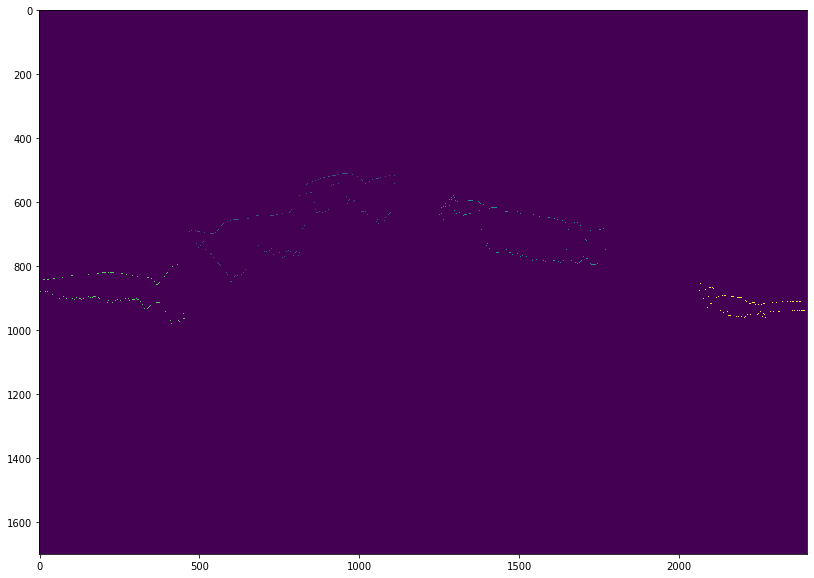

In [20]:
figure(figsize=(20,10))
imshow(edges)

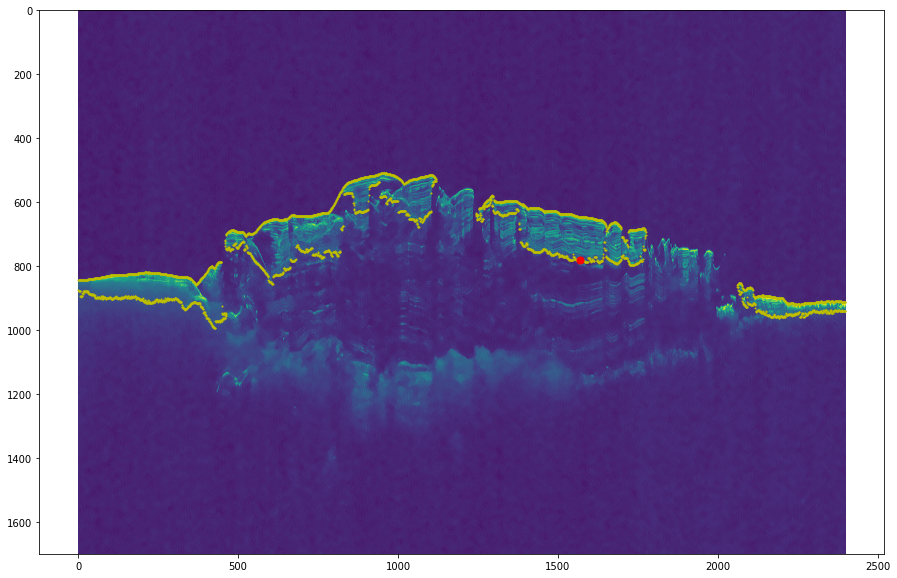

In [211]:
figure(figsize=(20,10))
imshow(imgInTiny)
plt.scatter(upperlimity,upperlimitx, c='y', s=1)
plt.scatter(lowerlimity,lowerlimitx, c='y', s=1)
plt.scatter(lowerlimity[1450],lowerlimitx[1450], c='r', s=50)
#plt.savefig('tshirtPT.png', dpi=1600)

# Thickness

[   0    1    2 ... 2397 2398 2399]
[31 34 36 ... 28 28 27]


Text(0, 0.5, 'Connected Component Thickness [px]')

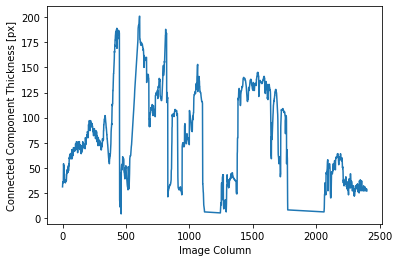

In [22]:
from ConnectedComp import Thickness

deltacolumn, delta = Thickness(upperlimity, upperlimitx, lowerlimity, lowerlimitx)
print(deltacolumn)
print(delta)

plt.plot(deltacolumn, delta)
plt.xlabel('Image Column')
plt.ylabel('Connected Component Thickness [px]')

In [22]:
deltalist = delta.tolist()
print(deltalist.index(4))

466


In [23]:
from ConnectedComp import Conversion
#This function has 3 possible argument: a thickness values array in pixel for each column of the selected connected components
#Data type specification: automatically US data (important for pixel to second conversion), specify "ITA" for italian data
#Value for dieletric const. : automatically eps = 3.15 from Putzig et al. 2009, tipical of pure water ice

deltasec, deltakm, deltam = Conversion(delta)

Thickness [sec] [1.1625e-06 1.2750e-06 1.3500e-06 ... 1.0500e-06 1.0500e-06 1.0125e-06]
Maximum thickness [microsec] 7.5375
Thickness [m]: [ 98.18121267 107.68262035 114.01689214 ...  88.67980499  88.67980499
  85.5126691 ]
Maximum thickness [m]: 636.5943144282279
Average thickness [m]: 269.92570504271316


Text(0, 0.5, 'Connected Component Thickness [m]')

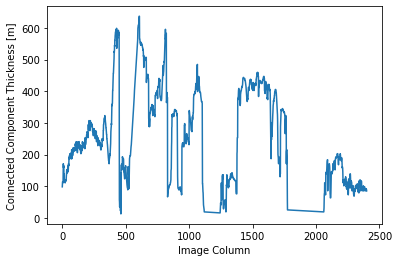

In [24]:
plt.plot(deltacolumn, deltam)
plt.xlabel('Image Column')
plt.ylabel('Connected Component Thickness [m]')

# Column selection

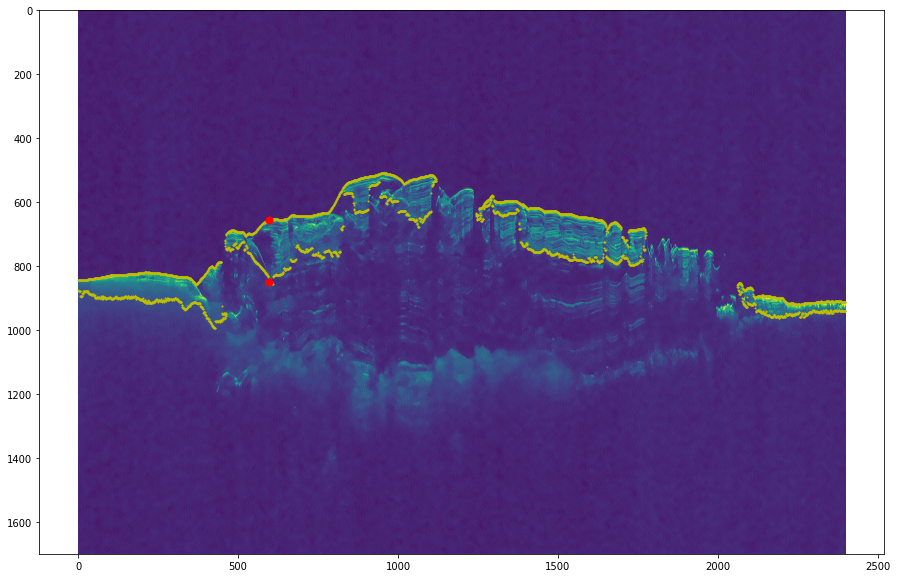

In [221]:
#first attempt
figure(figsize=(20,10))
imshow(imgInTiny)
plt.scatter(upperlimity,upperlimitx, c='y', s=1)
plt.scatter(lowerlimity,lowerlimitx, c='y', s=1)
plt.scatter(lowerlimity[602],lowerlimitx[602], c='r', s=50)
plt.scatter(upperlimity[602],upperlimitx[602], c='r', s=50)

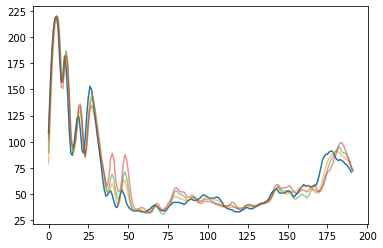

In [66]:
a = imgInTiny[upperlimitx[602]:lowerlimitx[602],upperlimity[602]]
plot(a)
b = imgInTiny[upperlimitx[603]:lowerlimitx[603],upperlimity[603]]
plot(b,alpha=0.5)
c = imgInTiny[upperlimitx[604]:lowerlimitx[604],upperlimity[604]]
plot(c,alpha=0.5)
d = imgInTiny[upperlimitx[605]:lowerlimitx[605],upperlimity[605]]
plot(d,alpha=0.5)

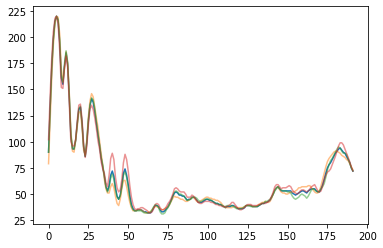

In [236]:
#case in which the selected columns have the same lenght and initial and final point (only b, c, d)

new = np.zeros_like(b) 
for i in range(len(b)):
    new[i] = (np.uint16(b[i])+np.uint16(c[i])+np.uint16(d[i]))/3

    
plot(new)
plot(b,alpha=0.5)
plot(c,alpha=0.5)
plot(d,alpha=0.5)

C:\Users\Alfonso Lovati\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 192, using nperseg = 192
  .format(nperseg, input_length))


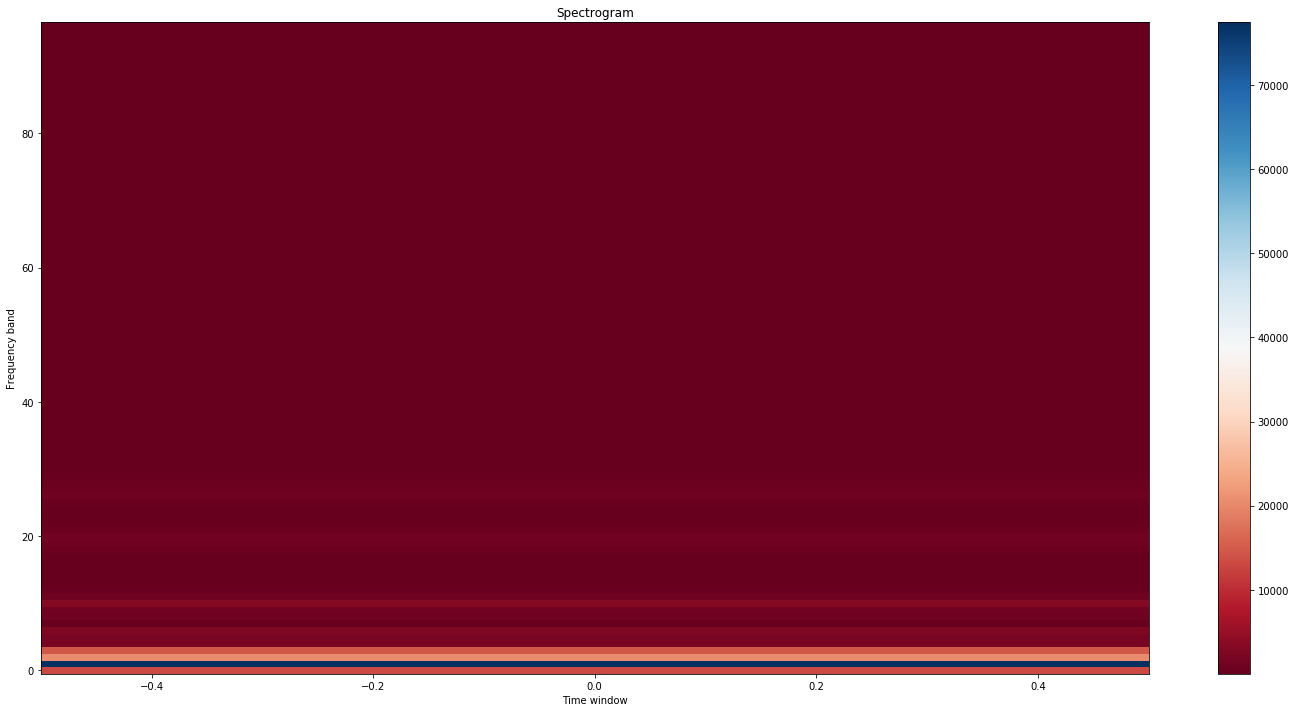

In [237]:
from scipy import signal
#T = 0.0375*10**(-6)
#fs = 1/T

freqs1, times, spectrogram = signal.spectrogram(new) #, fs)

plt.figure(figsize=(20, 10))
plt.imshow(spectrogram, aspect='auto', cmap='RdBu', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.colorbar()
plt.tight_layout()

In [238]:
print (1/freqs1[1:])
print (np.mean(freqs1))
print (np.std(freqs1))

[192.          96.          64.          48.          38.4
  32.          27.42857143  24.          21.33333333  19.2
  17.45454545  16.          14.76923077  13.71428571  12.8
  12.          11.29411765  10.66666667  10.10526316   9.6
   9.14285714   8.72727273   8.34782609   8.           7.68
   7.38461538   7.11111111   6.85714286   6.62068966   6.4
   6.19354839   6.           5.81818182   5.64705882   5.48571429
   5.33333333   5.18918919   5.05263158   4.92307692   4.8
   4.68292683   4.57142857   4.46511628   4.36363636   4.26666667
   4.17391304   4.08510638   4.           3.91836735   3.84
   3.76470588   3.69230769   3.62264151   3.55555556   3.49090909
   3.42857143   3.36842105   3.31034483   3.25423729   3.2
   3.14754098   3.09677419   3.04761905   3.           2.95384615
   2.90909091   2.86567164   2.82352941   2.7826087    2.74285714
   2.70422535   2.66666667   2.63013699   2.59459459   2.56
   2.52631579   2.49350649   2.46153846   2.43037975   2.4
   2.37037037   2.

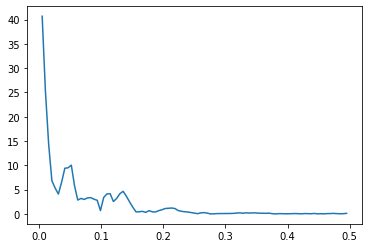

In [178]:
from numpy import fft

freqs = fft.fftfreq(len(b))

mask = freqs > 0

nwaves = freqs*len(b) #wave numbers: number of waves the signal needs to occupy the domain

fftvals = fft.fft(new)

fft_th = 2.0*np.abs(fftvals/len(b))
#print (fft_th[mask])

plt.plot(freqs[mask], fft_th[mask])
plt.show()

In [197]:
#conversion of the frequencies of the higher peaks to meters (?)

higher = np.where(fft_th[mask]>= 5.0e+00)
print(higher)

high_freq = []

for i in range(len(higher)):
    high_freq.append(freqs[mask][higher[i]])
    
print(high_freq)

high_freq_px = 1/high_freq[0]

high_freq_converted = Conversion(high_freq_px)
print (high_freq_converted[2])

(array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10], dtype=int64),)
[array([0.00520833, 0.01041667, 0.015625  , 0.02083333, 0.02604167,
       0.03645833, 0.04166667, 0.046875  , 0.05208333, 0.05729167])]
Thickness [sec] [7.20000000e-06 3.60000000e-06 2.40000000e-06 1.80000000e-06
 1.44000000e-06 1.02857143e-06 9.00000000e-07 8.00000000e-07
 7.20000000e-07 6.54545455e-07]
Maximum thickness [microsec] 7.199999999999999
Thickness [m]: [608.09009139 304.0450457  202.69669713 152.02252285 121.61801828
  86.87001306  76.01126142  67.56556571  60.80900914  55.2809174 ]
Maximum thickness [m]: 608.0900913941282
Average thickness [m]: 173.50091420798339
[608.09009139 304.0450457  202.69669713 152.02252285 121.61801828
  86.87001306  76.01126142  67.56556571  60.80900914  55.2809174 ]


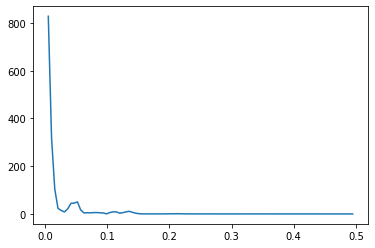

In [172]:
#power spectrum
ps = 2.0*(np.abs(fftvals/len(b))**2)

plt.plot(freqs[mask], ps[mask])
plt.show()

In [85]:
#cross checks

mean_new = np.mean(new)
std_new = np.std(new)
var_new = std_new**2

print (mean_new, std_new, var_new)

#sum of ps values
print ('ps sum:', np.sum(ps[mask]))
#number of values equal between var_new and ps sum give an idea of accuracy

65.63541666666667 39.706768889695894 1576.6274956597217
ps sum: 1576.6270616319441


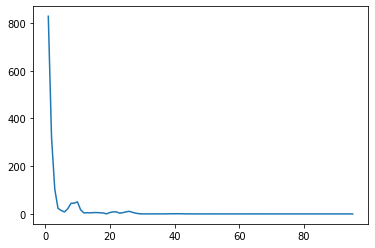

In [88]:
plt.plot(nwaves[mask], ps[mask])
plt.show()

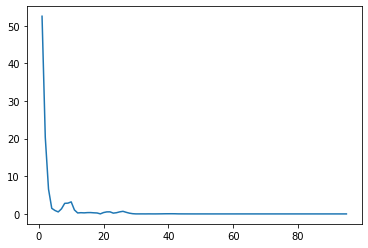

In [93]:
#to understand in witch percentage every freq contribute to the total signal

pow_var = ps/var_new*100.0

plt.plot(nwaves[mask], pow_var[mask])
plt.show()

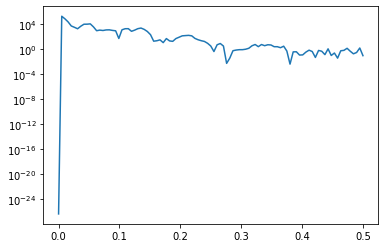

In [176]:
#Periodgram

f, Pxx_den = signal.periodogram(new)
plt.semilogy(f, Pxx_den)
#plt.plot(f,Pxx_den)
plt.show()

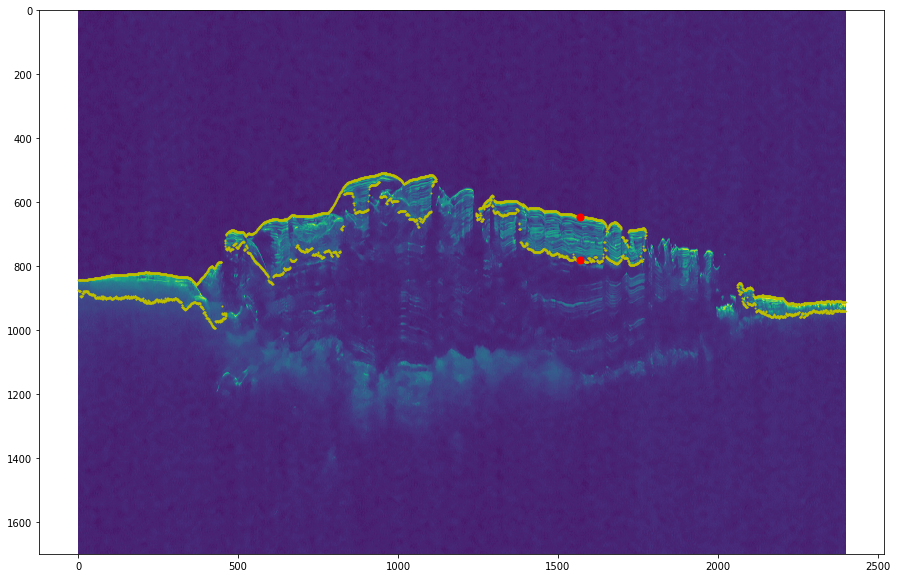

In [222]:
#second attempt
figure(figsize=(20,10))
imshow(imgInTiny)
plt.scatter(upperlimity,upperlimitx, c='y', s=1)
plt.scatter(lowerlimity,lowerlimitx, c='y', s=1)
plt.scatter(lowerlimity[1450],lowerlimitx[1450], c='r', s=50)
plt.scatter(upperlimity[1450],upperlimitx[1450], c='r', s=50)

135 134 134 134
646 781
647 781
647 781
647 781


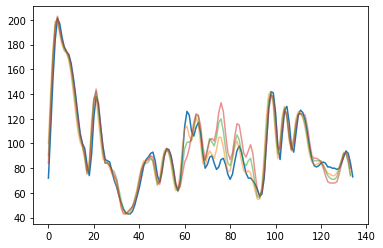

In [228]:
e = imgInTiny[upperlimitx[1450]:lowerlimitx[1450],upperlimity[1450]]
plot(e)
f = imgInTiny[upperlimitx[1451]:lowerlimitx[1451],upperlimity[1451]]
plot(f,alpha=0.5)
g = imgInTiny[upperlimitx[1452]:lowerlimitx[1452],upperlimity[1452]]
plot(g,alpha=0.5)
h = imgInTiny[upperlimitx[1453]:lowerlimitx[1453],upperlimity[1453]]
plot(h,alpha=0.5)

print (len(e), len(f), len(g), len(h))
print (upperlimitx[1450], lowerlimitx[1450]) #different initial coordinate
print (upperlimitx[1451], lowerlimitx[1451])
print (upperlimitx[1452], lowerlimitx[1452])
print (upperlimitx[1453], lowerlimitx[1453])

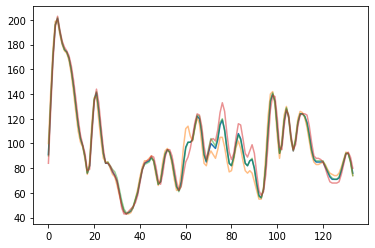

In [231]:
#case in which the selected columns have the same lenght and initial and final point (only f, g, h)

new1 = np.zeros_like(f) 
for i in range(len(f)):
    new1[i] = (np.uint16(f[i])+np.uint16(g[i])+np.uint16(h[i]))/3

    
plot(new1)
plot(f,alpha=0.5)
plot(g,alpha=0.5)
plot(h,alpha=0.5)

C:\Users\Alfonso Lovati\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 134, using nperseg = 134
  .format(nperseg, input_length))


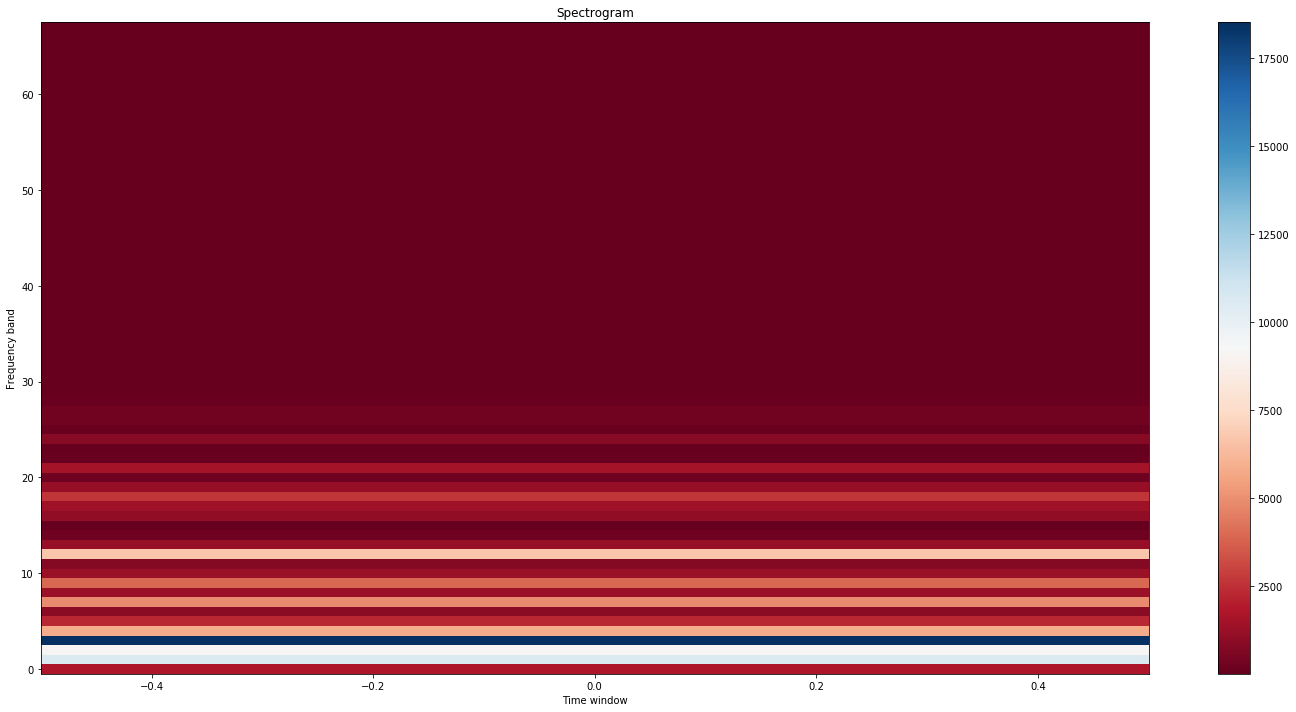

In [232]:
from scipy import signal

freqs11, times1, spectrogram1 = signal.spectrogram(new1) #, fs)

plt.figure(figsize=(20, 10))
plt.imshow(spectrogram1, aspect='auto', cmap='RdBu', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.colorbar()
plt.tight_layout()

In [239]:
print (1/freqs1[1:])
print (np.mean(freqs1))
print (np.std(freqs1))

[192.          96.          64.          48.          38.4
  32.          27.42857143  24.          21.33333333  19.2
  17.45454545  16.          14.76923077  13.71428571  12.8
  12.          11.29411765  10.66666667  10.10526316   9.6
   9.14285714   8.72727273   8.34782609   8.           7.68
   7.38461538   7.11111111   6.85714286   6.62068966   6.4
   6.19354839   6.           5.81818182   5.64705882   5.48571429
   5.33333333   5.18918919   5.05263158   4.92307692   4.8
   4.68292683   4.57142857   4.46511628   4.36363636   4.26666667
   4.17391304   4.08510638   4.           3.91836735   3.84
   3.76470588   3.69230769   3.62264151   3.55555556   3.49090909
   3.42857143   3.36842105   3.31034483   3.25423729   3.2
   3.14754098   3.09677419   3.04761905   3.           2.95384615
   2.90909091   2.86567164   2.82352941   2.7826087    2.74285714
   2.70422535   2.66666667   2.63013699   2.59459459   2.56
   2.52631579   2.49350649   2.46153846   2.43037975   2.4
   2.37037037   2.

[14.95507371 18.37524007 19.700933   16.53461485  5.98244988  9.06679452
 14.38308075  3.40731815  7.64045924  5.90072126  4.2960441   6.98573749
  4.30603429  3.60591984  3.20540655  5.78111228  6.30594692  4.07217601
  2.6781733   3.64533345  5.28834575  2.25205715  1.20005139  3.56563805
  2.10947759  1.14640895  1.6683203   1.2445018   1.34053781  0.862873
  0.47859572  0.64293038  0.38384062  0.09298426  0.32420003  0.45561789
  0.57218838  0.43701871  0.1546538   0.15441006  0.26809808  0.41622493
  0.16950964  0.18716732  0.24339387  0.36358759  0.09833934  0.09387636
  0.1642427   0.1408538   0.07090267  0.15825145  0.24191959  0.20734525
  0.14006845  0.13396513  0.12834606  0.09029937  0.04241483  0.06533958
  0.10557144  0.02230711  0.08374803  0.02673817  0.10266075  0.03348352]


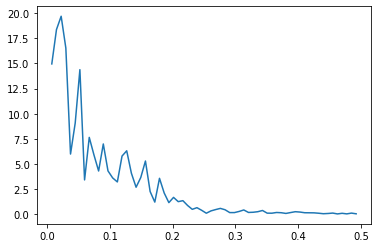

In [245]:
freqs2 = fft.fftfreq(len(f))

mask2 = freqs2 > 0

nwaves2 = freqs2*len(f) #wave numbers: number of waves the signal needs to occupy the domain

fftvals2 = fft.fft(new1)

fft_th2 = 2.0*np.abs(fftvals2/len(f))
print (fft_th2[mask2])

plt.plot(freqs2[mask2], fft_th2[mask2])
plt.show()

In [246]:
#conversion of the frequencies of the higher peaks to meters (?)

higher2 = np.where(fft_th2[mask2]>= 5.0e+00)
print(higher2)

high_freq2 = []

for i in range(len(higher2)):
    high_freq2.append(freqs2[mask2][higher2[i]])
    
print(high_freq2)

high_freq_px2 = 1/high_freq2[0]

high_freq_converted2 = Conversion(high_freq_px2)
print (high_freq_converted2[2])

(array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 11, 15, 16, 20], dtype=int64),)
[array([0.00746269, 0.01492537, 0.02238806, 0.02985075, 0.03731343,
       0.04477612, 0.05223881, 0.06716418, 0.07462687, 0.08955224,
       0.11940299, 0.12686567, 0.15671642])]
Thickness [sec] [5.02500000e-06 2.51250000e-06 1.67500000e-06 1.25625000e-06
 1.00500000e-06 8.37500000e-07 7.17857143e-07 5.58333333e-07
 5.02500000e-07 4.18750000e-07 3.14062500e-07 2.95588235e-07
 2.39285714e-07]
Maximum thickness [microsec] 5.025
Thickness [m]: [424.39620962 212.19810481 141.46540321 106.0990524   84.87924192
  70.7327016   60.62802995  47.1551344   42.43962096  35.3663508
  26.5247631   24.96448292  20.20934332]
Maximum thickness [m]: 424.39620961881866
Average thickness [m]: 99.77372607786957
[424.39620962 212.19810481 141.46540321 106.0990524   84.87924192
  70.7327016   60.62802995  47.1551344   42.43962096  35.3663508
  26.5247631   24.96448292  20.20934332]


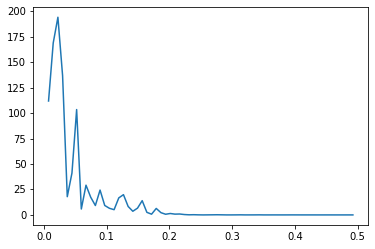

In [247]:
#power spectrum
ps2 = 2.0*(np.abs(fftvals2/len(f))**2)

plt.plot(freqs2[mask2], ps2[mask2])
plt.show()